# Demo of Edge Detection on the Test Data Set

In [1]:
## This notebook will be written as a function for the project. This is just to test different parameters.

In [2]:
# These parameters will be part of the function form input
DATA_DIR = r"./data/Data_RunA"
ext = ".png"

In [6]:
# Imports
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import colors
from matplotlib.patches import Circle
from matplotlib.path import Path
import numpy as np
from os.path import join, splitext
from os import listdir
import pandas as pd
import sys

# from baneel_scripts.scripts.clusters.processing import mask_circle, cluster_contours, circularity
import importlib
import scipy.ndimage as ndi
import pims
import scipy.signal as si
from matplotlib.patches import Ellipse, Circle

"""
import toolkit.curvature as tkcurv
sys.path.append('../') # not the best way to do this - fix
from toolkit.display import Pointer, AnimateImagesSeries # make sure the toolkit package is accessible 
from toolkit.cameras import phantom
from toolkit.image.process import regionprops_to_dataframe
from skimage import io, exposure, measure, feature, segmentation, filters, transform
"""

"\nimport toolkit.curvature as tkcurv\nsys.path.append('../') # not the best way to do this - fix\nfrom toolkit.display import Pointer, AnimateImagesSeries # make sure the toolkit package is accessible \nfrom toolkit.cameras import phantom\nfrom toolkit.image.process import regionprops_to_dataframe\nfrom skimage import io, exposure, measure, feature, segmentation, filters, transform\n"

In [4]:
im_list = sorted([splitext(f)[0] for f in listdir(DATA_DIR) if f.endswith(ext)])

x = np.zeros(len(im_list))
y = x
r = x


for i in np.arange(0, len(im_list), 1):
    # im = io.imread(join(DATA_DIR, im_list[i]+ext)).astype('uint8')
    img = cv2.imread(join(DATA_DIR, im_list[i] + ext), cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    detected_circles = cv2.HoughCircles(
        gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=1, maxRadius=40
    )
    if detected_circles is not None:
        # Convert the circle parameters a, b and r to integers.
        detected_circles = np.uint16(np.around(detected_circles))

        for pt in detected_circles[0, :]:
            a, b, r = pt[0], pt[1], pt[2]

            x[i] = a
            y[i] = b

            """
            # Draw the circumference of the circle. 
            cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
      
            # Draw a small circle (of radius 1) to show the center. 
            cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
            cv2.imshow("Detected Circle", img) 
            """

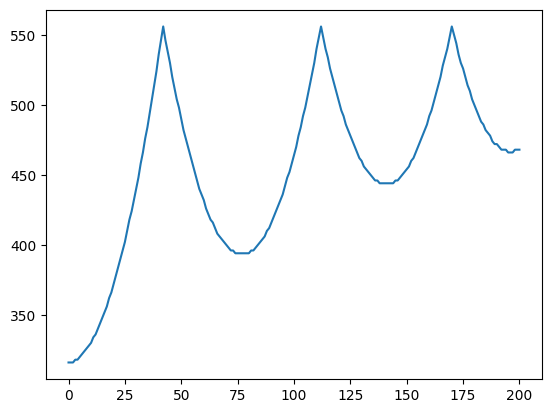

In [5]:
plt.plot(y)